# Vis

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchhk import *

## 1. Prepare MNIST Data

In [2]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

train_loader = DataLoader(dataset=train_data,
                          batch_size=20,
                          shuffle=True)

## 2. imshow

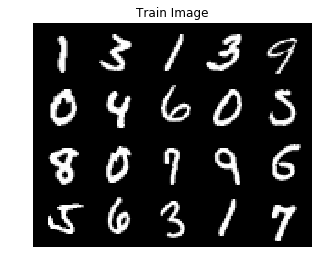

<Figure size 432x288 with 0 Axes>

In [3]:
images, labels = iter(train_loader).next()
imshow(images, ncols=5, title="Train Image")

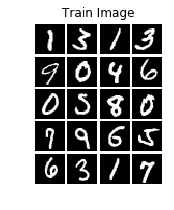

<Figure size 432x288 with 0 Axes>

In [4]:
imshow(images, figsize=(3, 3), ncols=4, pad_value=1, title="Train Image")

## 3. weightshow

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,16,5),
            nn.ReLU(),
            nn.Conv2d(16,32,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
    def forward(self,x):
        out = self.conv_layer(x)
        return out

In [6]:
model = CNN()

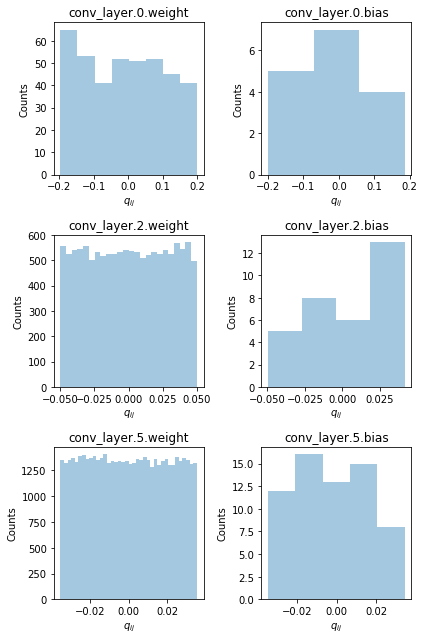

<Figure size 432x288 with 0 Axes>

In [7]:
weightshow(model, ncols=2, figsize=(3, 3))